## **K-Means Clustering**

In [10]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!pip install kaggle


In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d shwetabh123/mall-customers


Dataset URL: https://www.kaggle.com/datasets/shwetabh123/mall-customers
License(s): CC0-1.0
  0% 0.00/1.56k [00:00<?, ?B/s]
100% 1.56k/1.56k [00:00<00:00, 3.44MB/s]


In [8]:
!unzip mall-customers.zip -d mall_customers


Archive:  mall-customers.zip
  inflating: mall_customers/Mall_Customers.csv  


In [ ]:
import pandas as pd

# تحميل البيانات إلى DataFrame
df = pd.read_csv("mall_customers/Mall_Customers.csv")
"""
مجموعة البيانات  تتعلق بمعلومات العملاء في مركز تسوق، وهي تُستخدم غالبًا في تحليلات سلوك العملاء والتجزئة .
"""
# عرض أول 5 صفوف
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# عرض معلومات عن البيانات
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
# عرض الإحصائيات الوصفية
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
# التحقق من القيم المفقودة
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
"""
اختيار الميزات المناسبة للتجميع
Annual Income (k$) – الدخل السنوي للعميل بالألف دولار.
Spending Score (1-100) – معدل الإنفاق، وهو درجة تُحدد بناءً على سلوك العميل في الإنفاق والتسوق
نستخدم الميزات Annual Income (k$) و Spending Score (1-100) لأنهما مناسبان للتجزئة إلى مجموعات.
"""

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

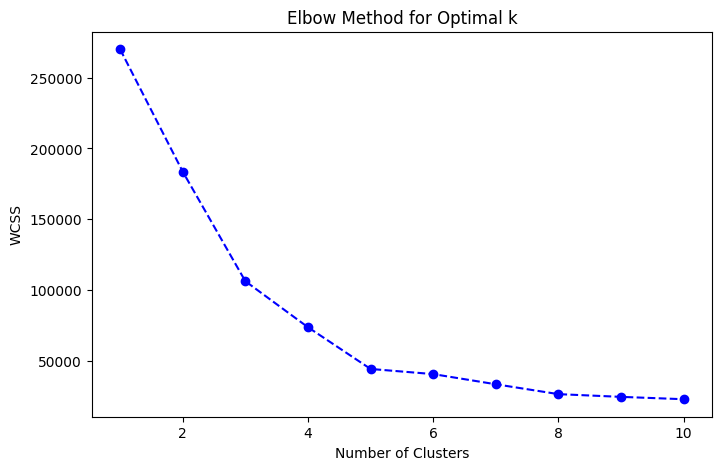

In [ ]:
wcss = []  # Within-Cluster Sum of Squares
# to selcet the best value(k)
for i in range(1, 11):  # تجربة عدد مجموعات من 1 إلى 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# رسم Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# إضافة عمود التجمعات إلى البيانات الأصلية
df['Cluster'] = y_kmeans


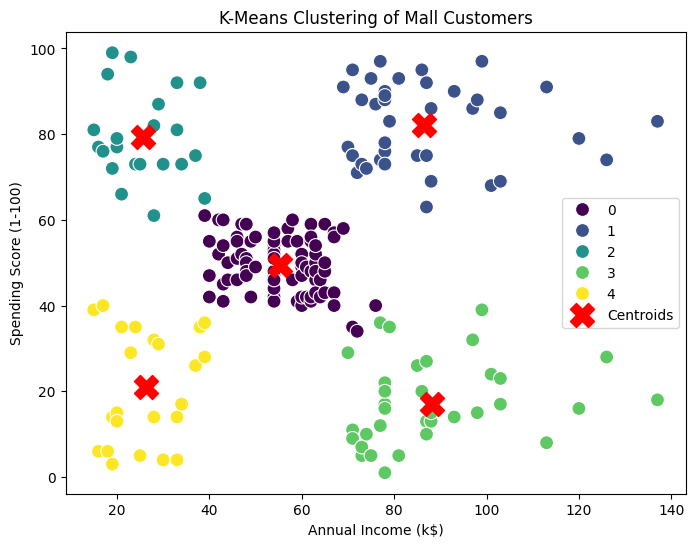

In [17]:
plt.figure(figsize=(8,6))

# رسم كل مجموعة بلون مختلف
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)

# إضافة مراكز التجمعات
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Mall Customers')
plt.legend()
plt.show()


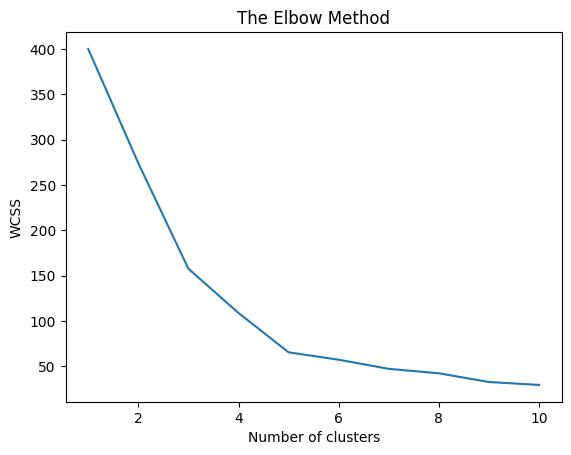

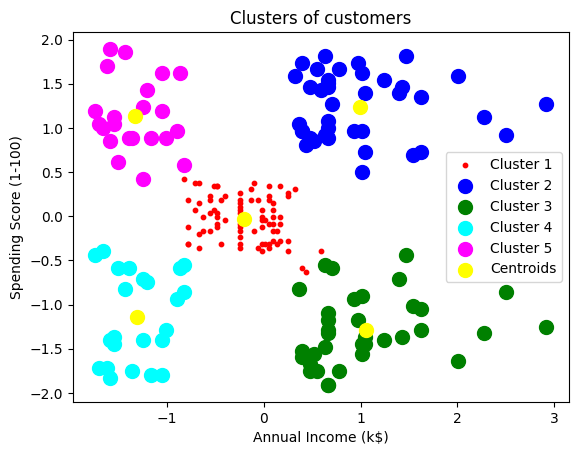

In [20]:
X = df.iloc[:, [3, 4]].values
from sklearn.preprocessing import StandardScaler # 0:1 MinMaxScaler //// ---> (z = (x - u) / s)
sc = StandardScaler()
X = sc.fit_transform(X)

# Using the elbow method to find the optimal number of clusters
#It measures the total squared distance of each sample to its closest cluster center.
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# # Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
